- 利用 pandas 計算 MA，並畫圖
- 利用 pandas 計算最近 45 天高低點，並畫圖
- 利用 matplotlib 畫圖 (視覺化)
- 利用 matplotlib 畫出損益曲線

In [1]:
# 引入模組
# matplotlib 為畫圖模組

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 讀取 csv 檔案
# 將 Date 欄位設定為「時間格式」的 index
# 這個很重要！！！ 因為這樣畫圖 x 軸才會有時間序

df = pd.read_csv("C:\\__STOCK\\DATA\\TWSE\\2330.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df = df.set_index("Date")
print(df.tail(10))

             Open   High    Low  Close  Volume
Date                                          
2025-04-11  848.0  889.0  836.0  889.0   81264
2025-04-14  895.0  903.0  865.0  865.0   72625
2025-04-15  874.0  879.0  865.0  877.0   35642
2025-04-16  867.0  869.0  852.0  855.0   47199
2025-04-17  849.0  856.0  842.0  847.0   36449
2025-04-18  853.0  858.0  850.0  850.0   23249
2025-04-21  844.0  847.0  832.0  835.0   20672
2025-04-22  826.0  829.0  816.0  816.0   32057
2025-04-23  853.0  873.0  848.0  873.0   40685
2025-04-24  886.0  886.0  859.0  864.0   34499


In [3]:
# 計算 MA & 最近45天高 & 最近45天低
# 我們會為要計算的資料新增 columns
# dropna() ： 去除缺失值
# shift(1) ： 沒有 shift 的情況會計算出 LL45(包括當天)，如果加入 shift 則會計算出昨日的 LL45(不包括當天)。為了避免 Close = High 的情況(不會出現訊號)。      

df["MA20"] = df["Close"].rolling(window=20).mean().dropna()
df["HH45"] = df["High"].rolling(window=45).max().shift(1)
df["LL45"] = df["Low"].rolling(window=45).min().shift(1)
print(df.tail(10))

             Open   High    Low  Close  Volume    MA20    HH45   LL45
Date                                                                 
2025-04-11  848.0  889.0  836.0  889.0   81264  931.15  1125.0  780.0
2025-04-14  895.0  903.0  865.0  865.0   72625  926.15  1125.0  780.0
2025-04-15  874.0  879.0  865.0  877.0   35642  922.05  1125.0  780.0
2025-04-16  867.0  869.0  852.0  855.0   47199  916.30  1125.0  780.0
2025-04-17  849.0  856.0  842.0  847.0   36449  910.10  1125.0  780.0
2025-04-18  853.0  858.0  850.0  850.0   23249  905.00  1115.0  780.0
2025-04-21  844.0  847.0  832.0  835.0   20672  897.50  1115.0  780.0
2025-04-22  826.0  829.0  816.0  816.0   32057  889.70  1100.0  780.0
2025-04-23  853.0  873.0  848.0  873.0   40685  884.75  1100.0  780.0
2025-04-24  886.0  886.0  859.0  864.0   34499  878.45  1100.0  780.0


In [4]:
# 指定時間段
# 有時候我們只需要某個時間段的狀況

df = df["2024":"2025"]
print(df.tail(10))

             Open   High    Low  Close  Volume    MA20    HH45   LL45
Date                                                                 
2025-04-11  848.0  889.0  836.0  889.0   81264  931.15  1125.0  780.0
2025-04-14  895.0  903.0  865.0  865.0   72625  926.15  1125.0  780.0
2025-04-15  874.0  879.0  865.0  877.0   35642  922.05  1125.0  780.0
2025-04-16  867.0  869.0  852.0  855.0   47199  916.30  1125.0  780.0
2025-04-17  849.0  856.0  842.0  847.0   36449  910.10  1125.0  780.0
2025-04-18  853.0  858.0  850.0  850.0   23249  905.00  1115.0  780.0
2025-04-21  844.0  847.0  832.0  835.0   20672  897.50  1115.0  780.0
2025-04-22  826.0  829.0  816.0  816.0   32057  889.70  1100.0  780.0
2025-04-23  853.0  873.0  848.0  873.0   40685  884.75  1100.0  780.0
2025-04-24  886.0  886.0  859.0  864.0   34499  878.45  1100.0  780.0


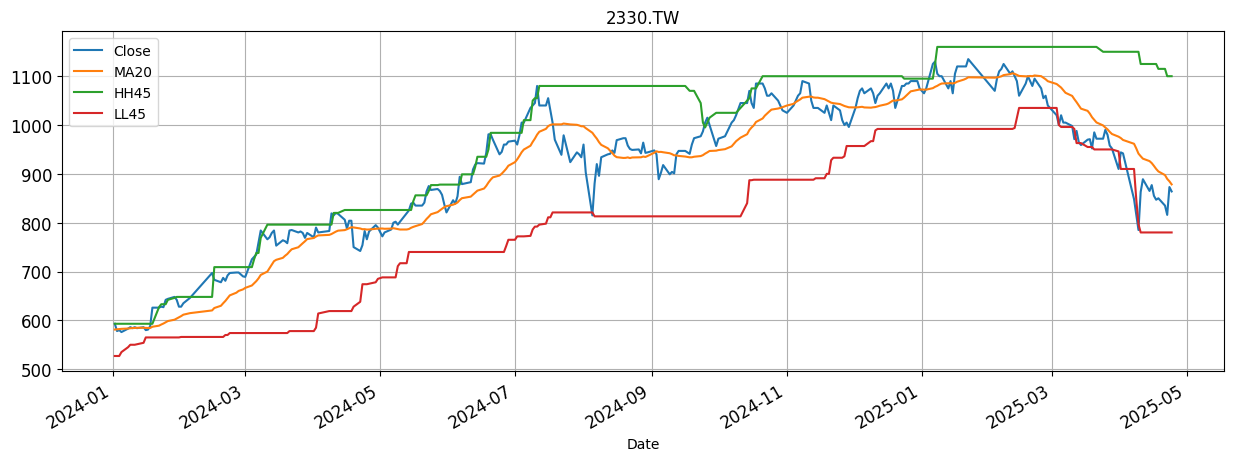

In [5]:
# 畫出 MA20 & HH45 & LL45

df[["Close", "MA20", "HH45", "LL45"]].plot(title="2330.TW", figsize=(15, 5), fontsize=12, grid=True)
plt.show()

In [6]:
# 計算每日報酬率

df["Return"] = (df["Close"] / df["Close"].shift(1)) - 1
print(df.head(10))

             Open   High    Low  Close  Volume    MA20   HH45   LL45    Return
Date                                                                          
2024-01-02  590.0  593.0  589.0  593.0   27997  581.20  593.0  527.0       NaN
2024-01-03  584.0  585.0  576.0  578.0   40134  581.60  593.0  527.0 -0.025295
2024-01-04  580.0  581.0  577.0  580.0   18063  582.10  593.0  527.0  0.003460
2024-01-05  578.0  580.0  574.0  576.0   22008  582.60  593.0  535.0 -0.006897
2024-01-08  582.0  585.0  579.0  583.0   19270  583.25  593.0  545.0  0.012153
2024-01-09  588.0  589.0  583.0  586.0   23718  583.85  593.0  550.0  0.005146
2024-01-10  581.0  586.0  580.0  584.0   13708  584.15  593.0  550.0 -0.003413
2024-01-11  586.0  589.0  583.0  586.0   27842  584.60  593.0  550.0  0.003425
2024-01-12  581.0  588.0  581.0  584.0   17636  584.70  593.0  551.0 -0.003413
2024-01-15  590.0  590.0  585.0  586.0   21900  584.75  593.0  554.0  0.003425


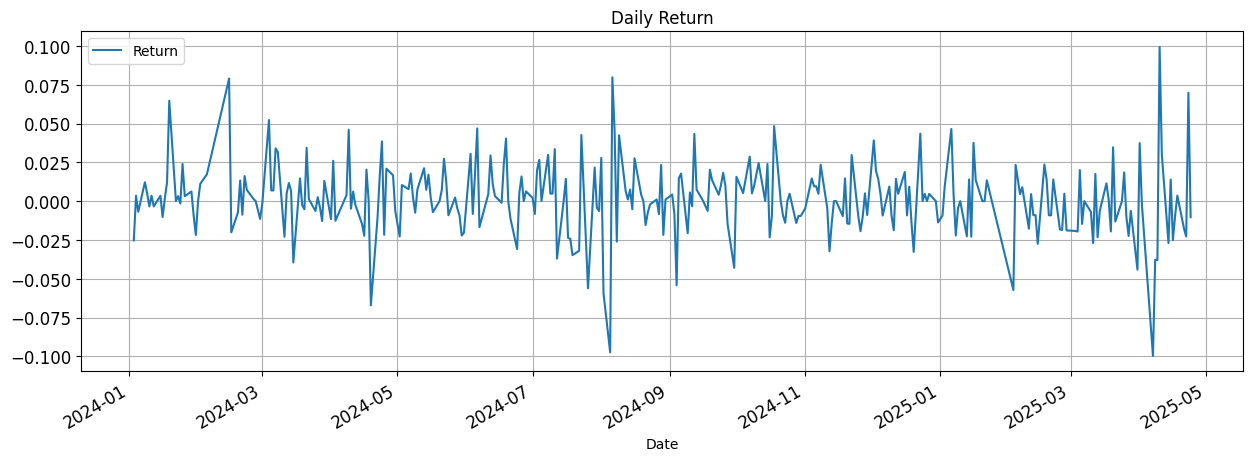

In [7]:
# 畫出每日報酬率

df[["Return"]].plot(title="Daily Return", figsize=(15, 5), fontsize=12, grid=True)
plt.show()

In [8]:
# 計算累計報酬率

df["AccReturn"] = df.Close / df.iloc[0]["Close"]
print(df[["AccReturn"]].head(10))

            AccReturn
Date                 
2024-01-02   1.000000
2024-01-03   0.974705
2024-01-04   0.978078
2024-01-05   0.971332
2024-01-08   0.983137
2024-01-09   0.988196
2024-01-10   0.984823
2024-01-11   0.988196
2024-01-12   0.984823
2024-01-15   0.988196


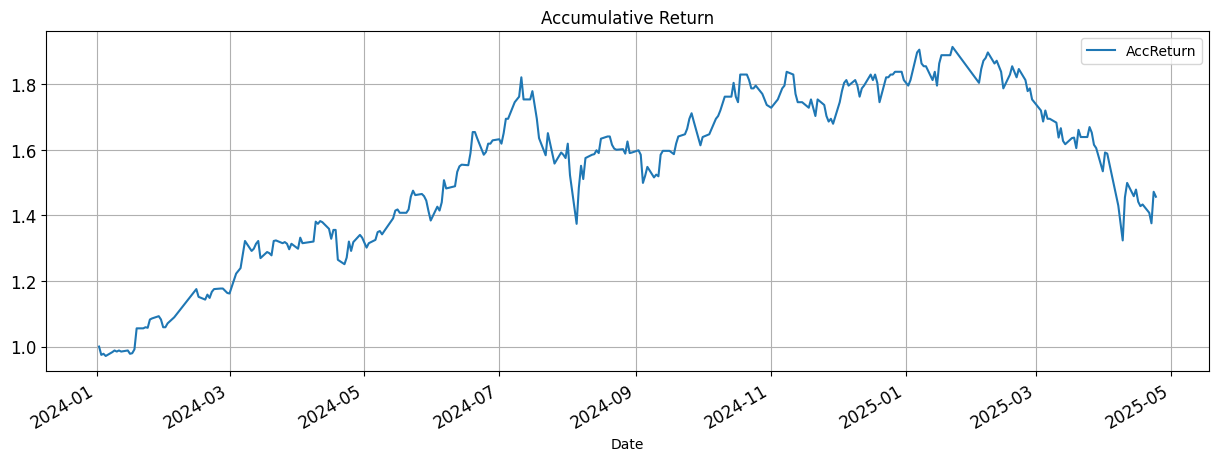

In [9]:
# 畫出累計報酬率

df[["AccReturn"]].plot(title="Accumulative Return", figsize=(15, 5), fontsize=12, grid=True)
plt.show()